

# Load Dataset



In [37]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Thyroid/thyroidDF.csv")
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


# Data Preprocessing

**Check for missing values**

In [38]:
missing_values = df.isnull().sum()
missing_values

,0
age,0
sex,307
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


* sex has 307 missing values
* TSH has	842 missing values
* T3 has 2604 missing values
* TT4 has 442 missing values
* T4U has 809 missing values
* FTI has 802 missing values
* TBG has 8823 missing values



**Remove rows with significant missing data**

* remove column which has more than 3000 missing values ie. TBG

In [42]:
df = df.dropna(axis=1, thresh=len(df) - 3000)
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,f,108.700305,f,0.976056,f,113.640746,f,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,t,128.000000,f,0.976056,f,113.640746,f,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,f,108.700305,f,0.976056,f,113.640746,t,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,f,108.700305,f,0.976056,f,113.640746,t,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,f,108.700305,f,0.976056,f,113.640746,t,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,t,64.000000,t,0.830000,t,77.000000,f,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,t,91.000000,t,0.920000,t,99.000000,f,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,t,113.000000,t,1.270000,t,89.000000,f,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,t,75.000000,t,0.850000,t,88.000000,f,other,-,870119027


 **Fill missing numerical values and Catgorical values**

In [43]:
df['TSH'].fillna(df['TSH'].mean(), inplace=True)
df['T3'].fillna(df['T3'].mean(), inplace=True)
df['TT4'].fillna(df['TT4'].mean(), inplace=True)
df['T4U'].fillna(df['T4U'].mean(), inplace=True)
df['FTI'].fillna(df['FTI'].mean(), inplace=True)

df['sex'].fillna(df['sex'].mode()[0], inplace=True)

df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,f,108.700305,f,0.976056,f,113.640746,f,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,t,128.000000,f,0.976056,f,113.640746,f,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,f,108.700305,f,0.976056,f,113.640746,t,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,f,108.700305,f,0.976056,f,113.640746,t,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,f,108.700305,f,0.976056,f,113.640746,t,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,t,64.000000,t,0.830000,t,77.000000,f,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,t,91.000000,t,0.920000,t,99.000000,f,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,t,113.000000,t,1.270000,t,89.000000,f,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,t,75.000000,t,0.850000,t,88.000000,f,other,-,870119027


**Converting into numerical data**

In [44]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})

binary_columns = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
                  'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor',
                  'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
                  'FTI_measured', 'TBG_measured']

for col in binary_columns:
    df[col] = df[col].map({'t': 1, 'f': 0})

df


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target,patient_id
0,29,0,0,0,0,0,0,0,0,1,...,0,108.700305,0,0.976056,0,113.640746,0,other,-,840801013
1,29,0,0,0,0,0,0,0,0,0,...,1,128.000000,0,0.976056,0,113.640746,0,other,-,840801014
2,41,0,0,0,0,0,0,0,0,0,...,0,108.700305,0,0.976056,0,113.640746,1,other,-,840801042
3,36,0,0,0,0,0,0,0,0,0,...,0,108.700305,0,0.976056,0,113.640746,1,other,-,840803046
4,32,0,0,0,0,0,0,0,0,0,...,0,108.700305,0,0.976056,0,113.640746,1,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,1,0,0,0,0,0,0,0,0,...,1,64.000000,1,0.830000,1,77.000000,0,SVI,-,870119022
9168,22,1,0,0,0,0,0,0,0,0,...,1,91.000000,1,0.920000,1,99.000000,0,SVI,-,870119023
9169,69,1,0,0,0,0,0,0,0,0,...,1,113.000000,1,1.270000,1,89.000000,0,SVI,I,870119025
9170,47,0,0,0,0,0,0,0,0,0,...,1,75.000000,1,0.850000,1,88.000000,0,other,-,870119027


**Remove unnecessary columns 'referral_source' and 'patient_id'**

In [45]:
df.drop(columns=['referral_source', 'patient_id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   int64  
 2   on_thyroxine         9172 non-null   int64  
 3   query_on_thyroxine   9172 non-null   int64  
 4   on_antithyroid_meds  9172 non-null   int64  
 5   sick                 9172 non-null   int64  
 6   pregnant             9172 non-null   int64  
 7   thyroid_surgery      9172 non-null   int64  
 8   I131_treatment       9172 non-null   int64  
 9   query_hypothyroid    9172 non-null   int64  
 10  query_hyperthyroid   9172 non-null   int64  
 11  lithium              9172 non-null   int64  
 12  goitre               9172 non-null   int64  
 13  tumor                9172 non-null   int64  
 14  hypopituitary        9172 non-null   int64  
 15  psych                9172 non-null   i

**remove duplicates**

In [46]:
df = df.drop_duplicates()
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,target
0,29,0,0,0,0,0,0,0,0,1,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,0,-
1,29,0,0,0,0,0,0,0,0,0,...,1,1.900000,1,128.000000,0,0.976056,0,113.640746,0,-
2,41,0,0,0,0,0,0,0,0,0,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,1,-
3,36,0,0,0,0,0,0,0,0,0,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,1,-
4,32,0,0,0,0,0,0,0,0,0,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,1,0,0,0,0,0,0,0,0,...,0,1.970629,1,64.000000,1,0.830000,1,77.000000,0,-
9168,22,1,0,0,0,0,0,0,0,0,...,0,1.970629,1,91.000000,1,0.920000,1,99.000000,0,-
9169,69,1,0,0,0,0,0,0,0,0,...,0,1.970629,1,113.000000,1,1.270000,1,89.000000,0,I
9170,47,0,0,0,0,0,0,0,0,0,...,0,1.970629,1,75.000000,1,0.850000,1,88.000000,0,-


**Showing outliers**

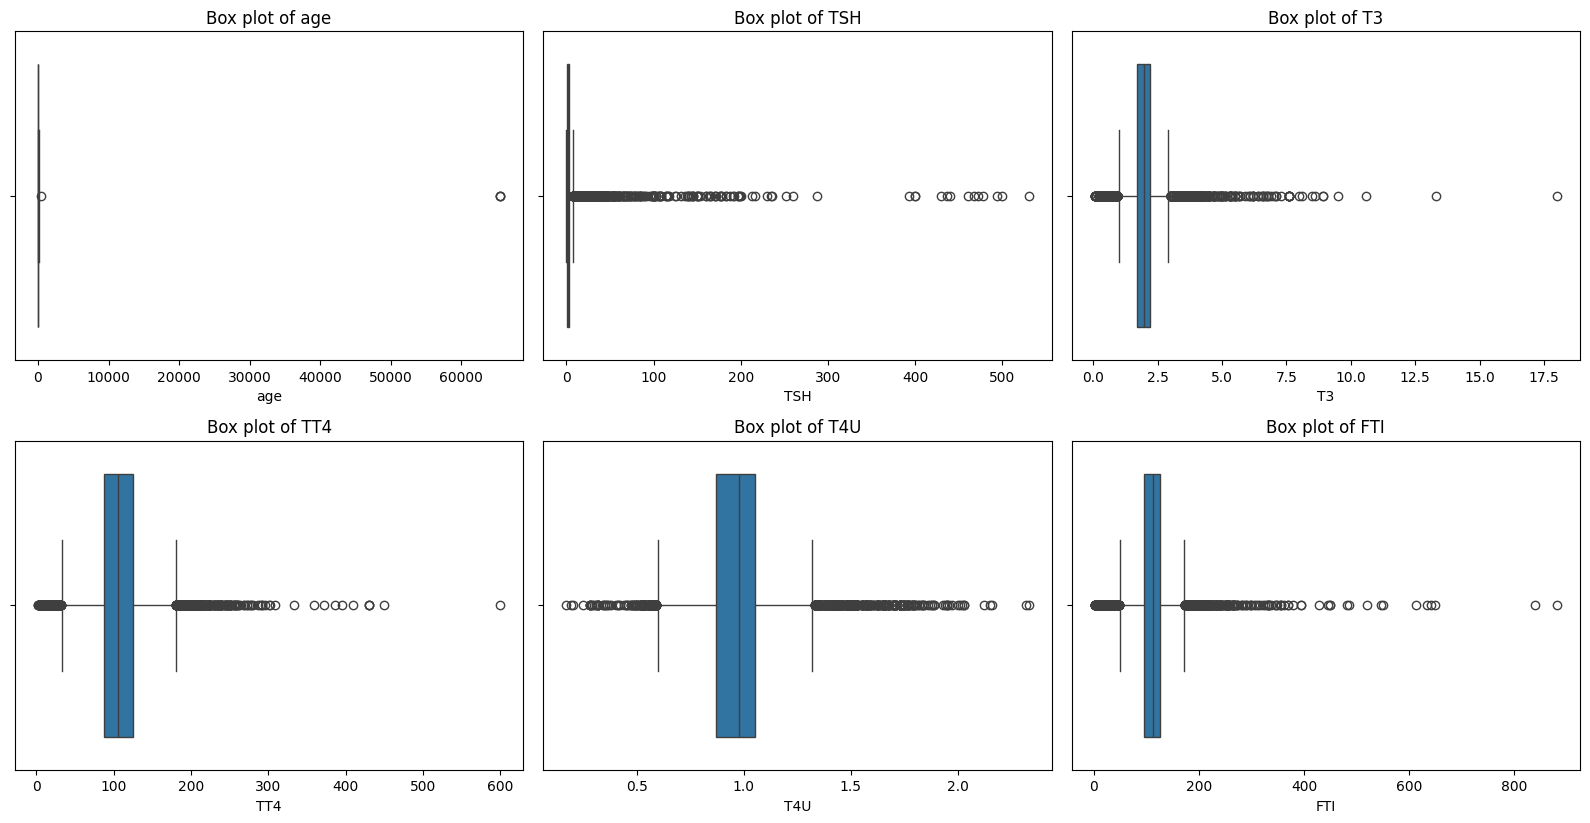

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# List of numerical features to visualize
numerical_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Create a box plot for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

**Analyze target class distribution**

In [48]:
class_distribution = df['target'].value_counts()
class_distribution

,count
target,
-,6692
K,436
G,359
I,346
F,233
R,196
A,147
L,115
M,111


In [49]:
class_percentage = df['target'].value_counts(normalize=True) * 100
class_percentage

,proportion
target,
-,73.773564
K,4.806526
G,3.957667
I,3.814353
F,2.568625
R,2.160732
A,1.620549
L,1.267776
M,1.223680


**Classify under no thyroid and thyroid**

In [55]:
def classify_thyroid(condition):
    if condition=='-':  # Replace with actual class names
        return 'no thyroid'
    else:
        return 'thyroid'

# Apply the classification function
df['target'] = df['target'].apply(classify_thyroid)
df['target'].value_counts()

,count
target,
no thyroid,6692
thyroid,2379


In [56]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,target
0,29,0,0,0,0,0,0,0,0,1,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,0,no thyroid
1,29,0,0,0,0,0,0,0,0,0,...,1,1.900000,1,128.000000,0,0.976056,0,113.640746,0,no thyroid
2,41,0,0,0,0,0,0,0,0,0,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,1,no thyroid
3,36,0,0,0,0,0,0,0,0,0,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,1,no thyroid
4,32,0,0,0,0,0,0,0,0,0,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,1,thyroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,1,0,0,0,0,0,0,0,0,...,0,1.970629,1,64.000000,1,0.830000,1,77.000000,0,no thyroid
9168,22,1,0,0,0,0,0,0,0,0,...,0,1.970629,1,91.000000,1,0.920000,1,99.000000,0,no thyroid
9169,69,1,0,0,0,0,0,0,0,0,...,0,1.970629,1,113.000000,1,1.270000,1,89.000000,0,thyroid
9170,47,0,0,0,0,0,0,0,0,0,...,0,1.970629,1,75.000000,1,0.850000,1,88.000000,0,no thyroid


#Resampling-Oversampling

In [62]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('target', axis=1)  # Replace 'target_column' with the actual name of your target column
y = df['target']
# Define the oversampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_res, y_res = ros.fit_resample(X, y)

# Check the class distribution
#print(y_res.value_counts())
df = pd.concat([X_res, y_res], axis=1)
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,target
0,29,0,0,0,0,0,0,0,0,1,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,0,no thyroid
1,29,0,0,0,0,0,0,0,0,0,...,1,1.900000,1,128.000000,0,0.976056,0,113.640746,0,no thyroid
2,41,0,0,0,0,0,0,0,0,0,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,1,no thyroid
3,36,0,0,0,0,0,0,0,0,0,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,1,no thyroid
4,32,0,0,0,0,0,0,0,0,0,...,0,1.970629,0,108.700305,0,0.976056,0,113.640746,1,thyroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13379,75,1,0,0,0,0,0,0,0,0,...,1,0.600000,1,80.000000,1,0.720000,1,110.000000,0,thyroid
13380,22,1,0,0,0,0,0,0,0,0,...,1,1.100000,1,119.000000,1,0.880000,1,135.000000,0,thyroid
13381,45,0,0,0,0,0,0,0,0,0,...,0,1.970629,1,65.000000,1,1.150000,1,57.000000,0,thyroid
13382,74,1,0,0,0,0,0,0,0,0,...,1,0.700000,1,68.000000,1,0.770000,1,89.000000,0,thyroid


#Feature selection

**using univariate feature selection**

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

#score of each feature
feature_scores

#selection of 9 features with top scores
k = 9  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
selected_features

#use only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected
#X_test_selected

,sex,on_thyroxine,pregnant,psych,TSH_measured,TSH,TT4,T4U,FTI
3487,0,0,1,0,1,0.035,119.0,1.55,76.0
3289,0,0,0,0,1,1.200,109.0,1.08,100.0
414,0,0,0,1,1,0.100,109.0,1.07,102.0
7535,0,0,0,0,1,2.500,87.0,1.08,81.0
8008,0,0,0,0,1,7.800,77.0,0.76,101.0
...,...,...,...,...,...,...,...,...,...
11964,1,1,0,0,1,30.500,32.0,0.63,51.0
5191,0,0,0,0,1,1.700,130.0,1.05,123.0
5390,0,0,0,0,1,1.300,161.0,1.33,121.0
860,0,0,1,0,1,0.100,201.0,1.14,176.0


#Train the model using random forest

**Accuracy and report**

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#accuracy
report

'              precision    recall  f1-score   support\n\n  no thyroid       0.95      0.94      0.94      1344\n     thyroid       0.94      0.95      0.94      1333\n\n    accuracy                           0.94      2677\n   macro avg       0.94      0.94      0.94      2677\nweighted avg       0.94      0.94      0.94      2677\n'

# Confusion Matrix

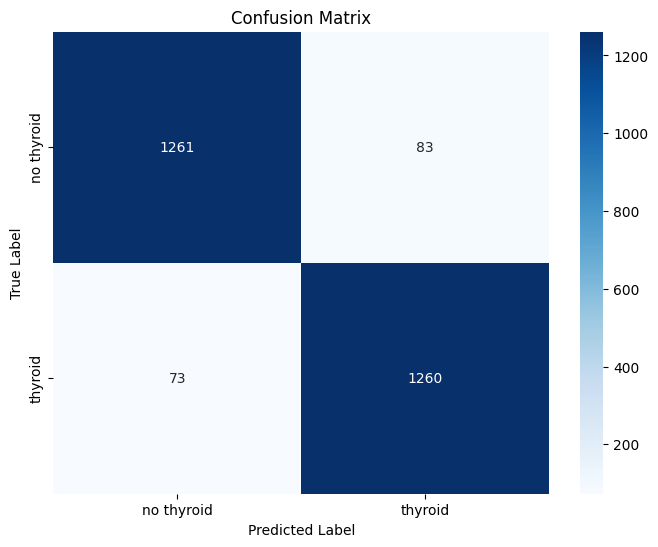

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['no thyroid', 'thyroid'])  # Replace with actual labels if different

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['no thyroid', 'thyroid'], yticklabels=['no thyroid', 'thyroid'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Saving the trained Model

*   save as model.pkl
*   save as scaler.pkl



In [84]:
import pickle

from sklearn.preprocessing import StandardScaler


# Assuming you have a trained model
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)  # Train your model

# Save the model to a file
with open('/content/drive/MyDrive/Thyroid/model.pkl','wb') as file:
    pickle.dump(model, file)

# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train_selected)

# Save the scaler to a file
with open('/content/drive/MyDrive/Thyroid/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


#to find the model
import os

# List files in the directory
print(os.listdir('/content/drive/MyDrive/Thyroid/'))

['thyroidDF.csv', 'ThyroidRun.ipynb', 'sample.ipynb', 'model.pkl', 'scaler.pkl']
